Mini-Project: Advanced Statistical Analysis Of Apple Inc. Stock Data



What You Will Learn

Master statistical analysis of financial data using NumPy and SciPy.
Learn effective data visualization techniques with Matplotlib for financial trends.
Apply hypothesis testing to financial datasets for meaningful insights.
Understand and utilize advanced statistical techniques in NumPy and SciPy.


Project Description

Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:



Initial Data Exploration

Load the dataset using Pandas. Check for null values and understand data types.
Examine the time series properties of the data (e.g., frequency, trends).


Data Visualization

Utilize Matplotlib to plot closing prices and traded volume over time.
Create a candlestick chart to depict high and low prices.


Statistical Analysis

Compute summary statistics (mean, median, standard deviation) for key columns.
Analyze closing prices with a moving average.


Hypothesis Testing

Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy.


Advanced Statistical Techniques (Bonus)

Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
Analyze correlations between moving averages of closing prices and trading volume across time periods.


Resources

Dataset: dowmload it from this repository : AAPL Stock Data (2007-2023)

Includes daily data like volume, VWAP, open, close, high, low prices, and number of transactions.



Project Submission

Submit a Jupyter Notebook with :

All analysis code and visualizations.
Detailed explanations of findings at each step.
A comprehensive summary of insights, focusing on advanced statistical analysis.
A ‘Reflection’ section detailing challenges and solutions.
Suggested structure:



1. Data Loading and Exploration
2. Data Visualization
3. Statistical Analysis
4. Hypothesis Testing
5. Advanced Statistical Techniques (Bonus)
    - Signal Processing using SciPy
    - Statistical Functions in NumPy
6. Summary and Insights
7. Reflection


Guidance

Experiment with different filters and parameters in signal processing techniques.
Thoroughly understand each statistical function and its insights on the stock data.


In [2]:
import pandas as pd

file_path = '/content/AAPL, 1D 01012007-12072023.csv'
apple_stock_data = pd.read_csv(file_path)

apple_stock_data.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

apple_stock_data.isnull().sum()
apple_stock_data.dtypes

apple_stock_data['time'] = pd.to_datetime(apple_stock_data['time'], unit='s')



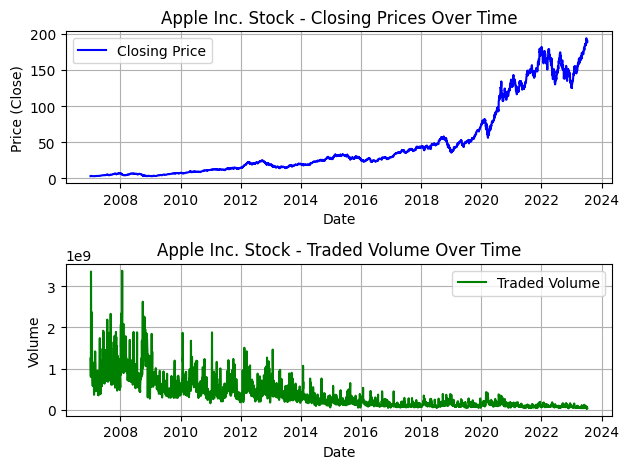

In [4]:
import matplotlib.pyplot as plt

# Plot the closing prices over time
plt.subplot(2, 1, 1)
plt.plot(apple_stock_data['time'], apple_stock_data['close'], color='blue', label='Closing Price')
plt.title('Apple Inc. Stock - Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Close)')
plt.grid(True)
plt.legend()

# Plot the traded volume over time
plt.subplot(2, 1, 2)
plt.plot(apple_stock_data['time'], apple_stock_data['volume'], color='green', label='Traded Volume')
plt.title('Apple Inc. Stock - Traded Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

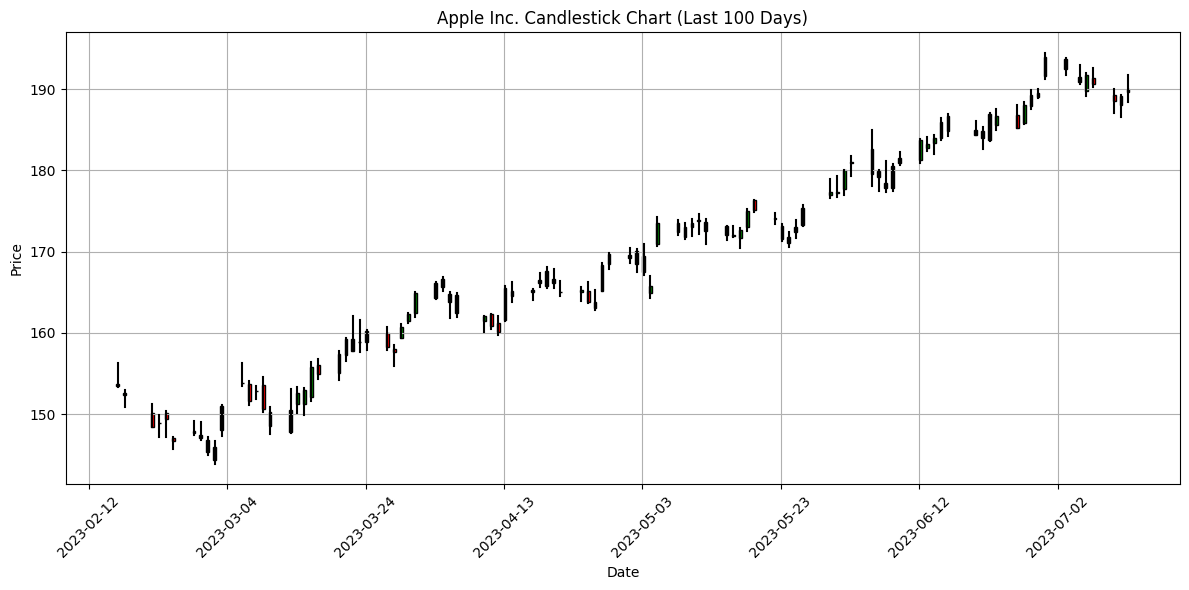

In [16]:
subset_data = apple_stock_data[['time', 'open', 'high', 'low', 'close']].tail(100)

subset_data['time'] = mdates.date2num(subset_data['time'])

fig, ax = plt.subplots(figsize=(12, 6))
for idx, row in subset_data.iterrows():
    color = 'green' if row['close'] >= row['open'] else 'red'
    ax.plot([row['time'], row['time']], [row['low'], row['high']], color='black')
    ax.add_patch(plt.Rectangle((row['time'] - 0.2, min(row['open'], row['close'])),
                               0.4, abs(row['close'] - row['open']),
                               edgecolor='black', facecolor=color))

ax.xaxis.set_major_locator(ticker.MaxNLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.title('Apple Inc. Candlestick Chart (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
summary_stats = apple_stock_data[['close', 'volume', 'transactions']].agg(['mean', 'median', 'std'])

apple_stock_data['MA20'] = apple_stock_data['close'].rolling(window=20).mean()
apple_stock_data['MA50'] = apple_stock_data['close'].rolling(window=50).mean()


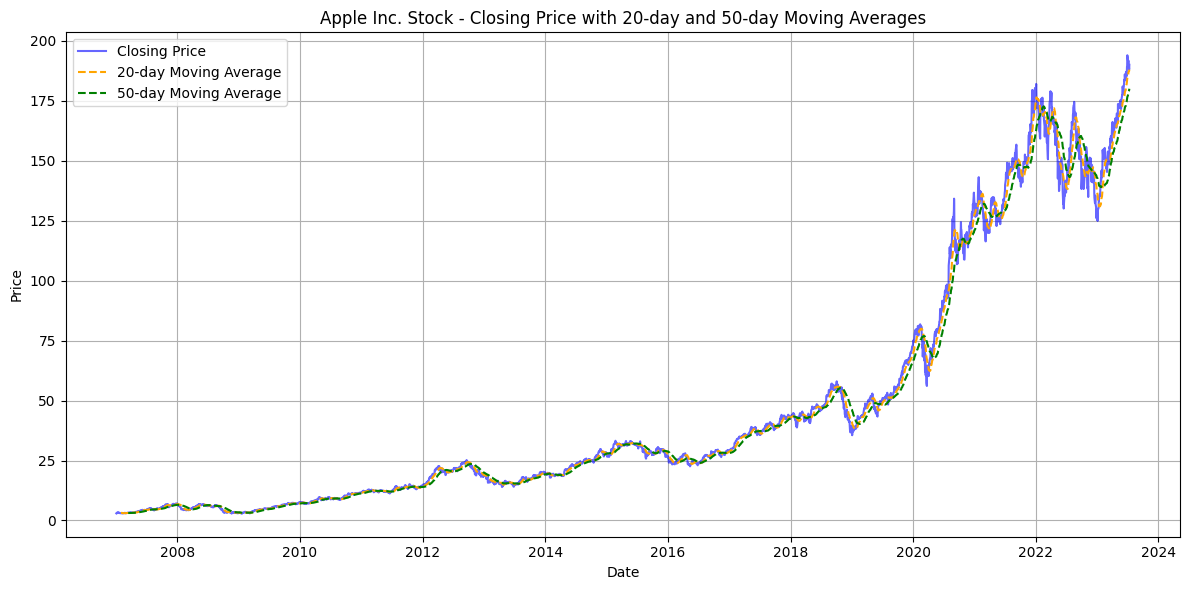

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(apple_stock_data['time'], apple_stock_data['close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(apple_stock_data['time'], apple_stock_data['MA20'], label='20-day Moving Average', color='orange', linestyle='--')
plt.plot(apple_stock_data['time'], apple_stock_data['MA50'], label='50-day Moving Average', color='green', linestyle='--')

plt.title('Apple Inc. Stock - Closing Price with 20-day and 50-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
apple_stock_data['year'] = apple_stock_data['time'].dt.year
closing_2007 = apple_stock_data[apple_stock_data['year'] == 2007]['close']
closing_2022 = apple_stock_data[apple_stock_data['year'] == 2022]['close']
t_stat, p_value = stats.ttest_ind(closing_2007, closing_2022, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -181.48488950892434, p-value: 2.509996863867247e-271


T-statistic value: -181.48: This extremely large (in magnitude) negative value suggests a very strong difference between the two means. A value this far from zero is highly unlikely to occur if the two groups actually had the same average, which leads to rejecting the null hypothesis.

P-value: 2.51 \times 10^-271: is an extremely small number that indicates there is almost no chance that the observed difference in average closing prices between 2007 and 2022 is due to random variation. Therefore, its possible confidently reject the null hypothesis that the means are the same. In simpler terms, the price difference between these two years is statistically significant.

In [21]:
apple_stock_data['daily_return'] = apple_stock_data['close'].pct_change()
daily_returns = apple_stock_data['daily_return'].dropna()
shapiro_stat, shapiro_p_value = stats.shapiro(daily_returns)
print(f"Shapiro-Wilk Test - Statistic: {shapiro_stat}, p-value: {shapiro_p_value}")

Shapiro-Wilk Test - Statistic: 0.940666076855671, p-value: 6.180858977992611e-38


Shapiro-Wilk statistic: 0.941: This value is slightly lower than 1, which already suggests some deviation from normality.
P-value: 6.19 \times 10^-38: this is an extraordinarily small p-value. It strongly indicates that the data does not follow a normal distribution. In the context of stock returns, this is an important finding, as many financial models assume normality. The non-normal distribution suggests that other statistical methods that do not rely on normality assumptions should be used.

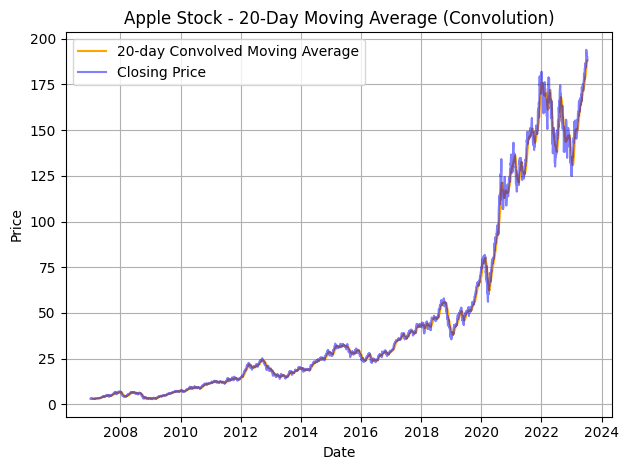

Convolved MA: [  3.17435    3.176025   3.1744   ... 187.309    187.665    187.975995]
Correlation between the 50-day moving average of closing prices and volume: -0.5892872432199519


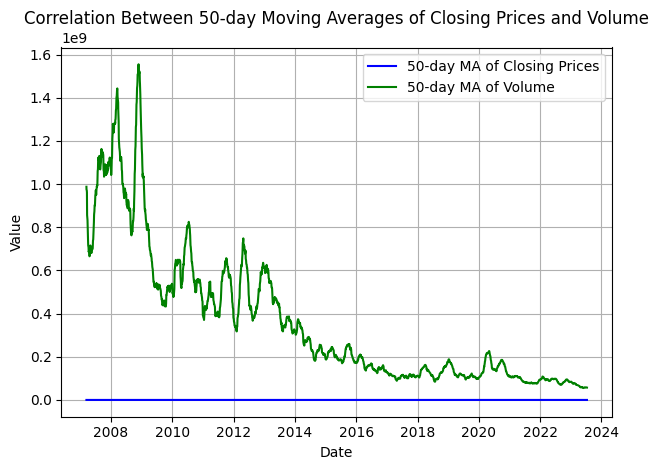

In [23]:
from scipy import signal

window_size = 20
kernel = np.ones(window_size) / window_size

convolved_ma = np.convolve(apple_stock_data['close'], kernel, mode='valid')

plt.plot(apple_stock_data['time'][window_size-1:], convolved_ma, label=f'{window_size}-day Convolved Moving Average', color='orange')
plt.plot(apple_stock_data['time'], apple_stock_data['close'], label='Closing Price', color='blue', alpha=0.5)
plt.title(f'Apple Stock - {window_size}-Day Moving Average (Convolution)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Convolved MA: {convolved_ma}")

apple_stock_data['MA_close'] = apple_stock_data['close'].rolling(window=50).mean()
apple_stock_data['MA_volume'] = apple_stock_data['volume'].rolling(window=50).mean()

apple_stock_data_filtered = apple_stock_data.dropna(subset=['MA_close', 'MA_volume'])

correlation = np.corrcoef(apple_stock_data_filtered['MA_close'], apple_stock_data_filtered['MA_volume'])[0, 1]

print(f"Correlation between the 50-day moving average of closing prices and volume: {correlation}")

plt.plot(apple_stock_data_filtered['time'], apple_stock_data_filtered['MA_close'], label='50-day MA of Closing Prices', color='blue')
plt.plot(apple_stock_data_filtered['time'], apple_stock_data_filtered['MA_volume'], label='50-day MA of Volume', color='green')
plt.title('Correlation Between 50-day Moving Averages of Closing Prices and Volume')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Negative correlation might suggest that as the price increases, there is a market correction or selling pressure driving the volume, signaling a bearish sentiment.

General Interpretation:
Trends in Closing Prices: The moving average (MA) helps to smooth short-term fluctuations in the stock’s closing prices, revealing long-term trends. Observing the direction of the MA can provide insights into the general direction of the stock (upward, downward, or sideways).
Volume and Price Relationship: The correlation between trading volume and price helps us understand market behavior. Strong correlations between price and volume can indicate trends, such as higher volumes pushing prices higher, or significant sell-offs driving prices down.
Usefulness for Investors: Traders and investors often rely on such technical indicators to make informed decisions. Moving averages are used to identify support and resistance levels, while volume can indicate the strength of a price movement.

Explanation of Statistical Techniques:

Convolution: By using convolution, we performed a mathematical operation that effectively “smooths” the time series, making it easier to identify general trends by eliminating the short-term noise.
Correlation: The correlation coefficient is a key measure that quantifies how strongly two variables are related. In finance, understanding the relationship between price and volume can help detect bullish or bearish trends.

Summary of Insights:

	1.	Smoothing trends with convolution shows clearer price patterns over time, filtering out daily noise.
	2.	Correlation analysis between moving averages of closing prices and volume can reveal whether high volumes are driving price changes, which is a critical insight for understanding market sentiment.

These insights are valuable for both technical analysts and traders looking for longer-term investment opportunities or trying to assess the market’s behavior based on historical stock data.
